#  Bayan Data Science School

### Working with Arabic language is always challenging

# Step 1: Import important libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression

import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [4]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Step 2: Read data file

In [5]:
# read csv file and save it in a data frame
data_df=pd.read_excel('ArabicSongData.xlsx') 

# Step 3: Explore that data

In [6]:
# how much data do I have?
len(data_df)

30000

In [7]:






# How about if I want to see part of the data?
data_df[1000:1200]

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area
1000,980265902989029376,2018-03-31 21:09:38,http://twitter.com/sami0879/status/980265902989029376,@Zeyad_jehani خذ مع شيله من احد الدرر المكنونه 🤔 https://t.co/If2ibP9Uc8 #قناة_بداية مش حتغمض عنيك 😂,@sami0879,سَــــامــيِ العَمري,Saudi Arabia,NaN,NaN
1001,949632166903894016,2018-01-06 07:22:06,http://twitter.com/sh0554553412/status/949632166903894016,شيلة 2018 باسم ام عبد الرحمن وام العروس ام ايمان وعبد الرحمن وايمان لطلب 0533348021:,@sh0554553412,#استديو_شيلات_تاليف قصايد _حسب الطلب,Saudi Arabia,NaN,NaN
1002,976766265439260674,2018-03-22 05:23:19,http://twitter.com/2M3__/status/976766265439260674,RT @9v4__ شيلة دق رقمه على رقمي ابو حنظله https://t.co/ZsU4m5xmML,@2M3__,مڷكﮬ̲̌ﮧ⁵⁰ᴷ المصممه المبدعه❤️مسافره,Saudi Arabia,NaN,NaN
1003,969212171031900160,2018-03-01 08:06:03,http://twitter.com/aaa0535651255a/status/969212171031900160,شيله تخرج 2018 باسم مها المعهبل $$ افرحي جعل اليالي سعادتك حصريه $ قابله لتعديل:,@aaa0535651255a,استيو تنفيذ شيلات,Saudi Arabia,NaN,NaN
1004,967513630672588801,2018-02-24 15:36:39,http://twitter.com/_andfa/status/967513630672588801,الصقري تراك امس صايح ع شيله كان طلعت اللي بقلبك اليوم بعد,@_andfa,إندفاع .,Saudi Arabia,NaN,NaN
1005,984760890934419456,2018-04-13 06:51:07,http://twitter.com/_9859097370982/status/984760890934419456,RT @iD7oMz مشيه مطنوخ .. شيله ذهب ولد ذهب .. 💙 . . #عبدالرحمن_العبدالسلام https://t.co/qZUczihjNx,@_9859097370982,#راشد_الفرشان,Saudi Arabia,NaN,NaN
1006,958207094058110976,2018-01-29 23:15:48,http://twitter.com/Tomalroqi/status/958207094058110976,RT @yahya_kk12 أحلا #صباحات #صباحات_الهلال واحلا واجمل #جمهور #جمهور_الهلال لذا رددو #ياهلال شيلوها شيلة الفوز الليلة عشان #الملز_يهتز 💙 #وبتوفيق_للملكي https://t.co/XsUc4gTI2c,@Tomalroqi,دياز,Saudi Arabia,NaN,NaN
1007,976221970261045248,2018-03-20 17:20:29,http://twitter.com/___wadha0/status/976221970261045248,#مليونيه_حيل_مشتاق ماشاء الله اليوم يوم المليونيات اول شي شيله @Jbr_993 واللحين شيله @sultan_business الف الف مبروك يالمحزم تستاهل اكثر والله,@___wadha0,وضوح,Saudi Arabia,Ash Sharqiyah,Ad Damman
1008,984144360391565317,2018-04-11 14:01:14,http://twitter.com/maha_iii9/status/984144360391565317,RT @hsaev2 #شيلة ودعتك الله وان زرت قبر الغلا احذر تعزيني مراسم الحزن غيمن ضيق افاقي غسلت جثمانه بدمعي ويكفيني وصلت عليه المشاعر وانكسر ساقي ودعتك الله مع توديعي سنيني قد راح ماراح منها مابقى باقي المنشد 👇🏼👇🏼 #خفايا_الشوق #تصميمي #غرام https://t.co/eS6bqbpDdS,@maha_iii9,مـــها؛الاهـلاوياَ⁵¹,Saudi Arabia,Makkah,Jeddah
1009,975845607360335872,2018-03-19 16:24:57,http://twitter.com/ataeoi991/status/975845607360335872,RT @kzOBgJLA7dUcPCt شيلة / ابشر بقلب مايبي غير طرياك https://t.co/ux4r7fqFjW,@ataeoi991,ريان الحبردي,Saudi Arabia,Al Quassim,NaN


# Step 4: apply the lexicon 

In [8]:
# Remove nosiy tweets
noise=["حسب الطلب", "للتواصل" , "تنفيذ بالاسماء"]

In [9]:
def remove_noise(tweet):
    label="ok"
    for word in noise:
        if word in tweet:
            label="noise"

    return label

In [10]:
# apply the method
data_df["is Noise"] = data_df['Contents'].apply(lambda x: remove_noise(x))

In [11]:
data_df.head()

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok
4,989403893703544832,2018-04-26 02:20:45,http://twitter.com/zxp__1007/status/989403893703544832,RT @alebda_11 بيع قصايد حسب الطلب وبسريه تامه للتواصل واتساب:0537417772 #قصايد #شيلة #نخوة #رثاء #فزاع #شاعر_المليون #بوح #الكويت #قطر #زواج #الامارات #مناسبة #زواجات #زفه #شيلات #تخرج #اخبار #خريج #تخريج #مدح #قصيده #الصماد #الاربعاء #فخر #السعودية_اولا #شكرا_تيسير_الجاسم,@zxp__1007,تسديد قروض 1M,Saudi Arabia,NaN,NaN,noise


In [12]:
# remove the noise
data_df=data_df[data_df["is Noise"]!="noise"]

In [13]:
data_df.head()

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok
5,967147319325089792,2018-02-23 15:21:04,http://twitter.com/4mosrbHTtCtNzoN/status/967147319325089792,RT @ataeoi991 شيلة سلطان البريكي 2018 - عريب الساس شهاب العز || بطىء https://t.co/7vqqix5pPU,@4mosrbHTtCtNzoN,أحمد مقبل,Saudi Arabia,Al Quassim,NaN,ok


In [14]:

# read positive words list
pos_df=pd.read_csv("posList.csv")

FileNotFoundError: [Errno 2] File b'posList.csv' does not exist: b'posList.csv'

In [15]:
pos_df

NameError: name 'pos_df' is not defined

In [16]:
pos_list=pos_df["word"].values.tolist()

NameError: name 'pos_df' is not defined

In [17]:
# apply the list to the data

In [18]:
def pos_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:
        
        if word in tweet:
            count+=1
    
    return count

In [19]:

#apply the method to the data
data_df["pos_count"] = data_df['Contents'].apply(lambda x: pos_sentiment(x))

NameError: name 'pos_list' is not defined

In [20]:
data_df.head()

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok
5,967147319325089792,2018-02-23 15:21:04,http://twitter.com/4mosrbHTtCtNzoN/status/967147319325089792,RT @ataeoi991 شيلة سلطان البريكي 2018 - عريب الساس شهاب العز || بطىء https://t.co/7vqqix5pPU,@4mosrbHTtCtNzoN,أحمد مقبل,Saudi Arabia,Al Quassim,NaN,ok


In [21]:





# read negative words list
neg_df=pd.read_csv("negList.csv")

FileNotFoundError: [Errno 2] File b'negList.csv' does not exist: b'negList.csv'

In [22]:
neg_list=neg_df["word"].values.tolist()

NameError: name 'neg_df' is not defined

In [23]:


def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neg_list:
        if word in tweet:
            count+=1
               
    return count

In [24]:

#apply the method to the data
data_df["neg_count"] = data_df['Contents'].apply(lambda x: neg_sentiment(x))

NameError: name 'neg_list' is not defined

In [25]:
data_df.head(100)

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok
5,967147319325089792,2018-02-23 15:21:04,http://twitter.com/4mosrbHTtCtNzoN/status/967147319325089792,RT @ataeoi991 شيلة سلطان البريكي 2018 - عريب الساس شهاب العز || بطىء https://t.co/7vqqix5pPU,@4mosrbHTtCtNzoN,أحمد مقبل,Saudi Arabia,Al Quassim,NaN,ok
6,955208539408134145,2018-01-21 16:40:37,http://twitter.com/otadi88/status/955208539408134145,RT @ataeoi991 شيلة عاصفة الحزم ~ كلمات عبيدالله الهذلي - أداء سهم هذيل HD https://t.co/P3guXF5yTm,@otadi88,مقبل الحبردي,Saudi Arabia,Al Quassim,NaN,ok
7,955851556666138624,2018-01-23 11:15:44,http://twitter.com/ST1TYyiEJ5I3AyT/status/955851556666138624,شيلة - ماخذ حقه بحب خشوم اخذ حقه بدق خشوم | اداء شبل الدواسر #طرب + Mp3🇸🇦🇸🇦🇸🇦🌺 https://t.co/OVwAQKAO0K,@ST1TYyiEJ5I3AyT,عتيق الغامدي,Saudi Arabia,NaN,NaN,ok
8,969908222051135491,2018-03-03 06:11:54,http://twitter.com/mocxz20511/status/969908222051135491,RT @sumuw606 شيلة الموسم - ياطول صبري كلمات محمد بن راشد ال مكتوم @HHShkMohd أداء عبدالرحمن الشيحاني @sh70ab خالد بن شارع الحبابي @kfh_hh https://t.co/e1LNX9Ew1V,@mocxz20511,اتحفظ,Saudi Arabia,Ar Riyad,Riyadh,ok
9,956032924255752192,2018-01-23 23:16:26,http://twitter.com/baderalsolmi/status/956032924255752192,@Fahad9960606485 @italotibi @1MOGAT شيلة || مارثة الضمين البدارين الدواسر || كلمات الشاعر عمر بن صبيح البدرا... https://t.co/WwbYlS1Rra via @YouTube https://t.co/a5aDglpCLA,@baderalsolmi,🔱 🦅☠️🔕♐️ ⚔️,Saudi Arabia,Ar Riyad,Riyadh,ok
10,966332508810956800,2018-02-21 09:23:18,http://twitter.com/m_n_o__7/status/966332508810956800,شيلة | زعلانة أنتي وأنا زعلان | كلمات سعيد ال مناع الشمراني اداء مسفر آل...https://t.co/6AUqaxVHSp عبر @YouTube,@m_n_o__7,ابو شــيخه,Saudi Arabia,Ar Riyad,NaN,ok


## Ok! but its not enough to know how many positive and negative words in each tweet. 
## We want to learn which tweet is positive and which is negative.

In [26]:
def tweet_sentiment(tweet):
    
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
    
    if pos_sent > neg_sent:
        label = "Positive"
    
    elif pos_sent < neg_sent:
        label = "Negative"
    else:
        label = "Neutral" 
   
   
    return label

In [27]:
data_df["sentiment"] = data_df['Contents'].apply(lambda x: tweet_sentiment(x))

NameError: name 'pos_list' is not defined

In [28]:
data_df.head()

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok
5,967147319325089792,2018-02-23 15:21:04,http://twitter.com/4mosrbHTtCtNzoN/status/967147319325089792,RT @ataeoi991 شيلة سلطان البريكي 2018 - عريب الساس شهاب العز || بطىء https://t.co/7vqqix5pPU,@4mosrbHTtCtNzoN,أحمد مقبل,Saudi Arabia,Al Quassim,NaN,ok


# Step 5: Explore the results

In [29]:
# Q: How many tweets have positive sentiment and how many have negative sentiment
tweets_by_sentiment = data_df['sentiment'].value_counts()

KeyError: 'sentiment'

NameError: name 'tweets_by_sentiment' is not defined

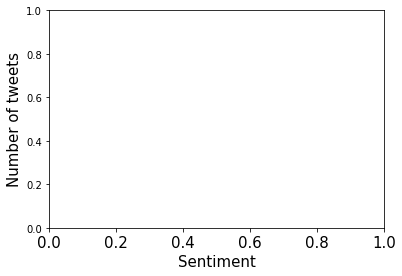

In [30]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)

tweets_by_sentiment.plot(ax=ax, kind='barh')

# Step 6: Clean the text

In [31]:
# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [32]:
def normalize_arabic(text):
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ؤ", "و", text)

    return text

In [33]:
#start processing the tweet 
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #check if the word in the dictionary list (it have two letters as part of the word)
    tweet= normalize_arabic(tweet)
    
    
    #remove numbers
    tweet = ''.join(i for i in tweet if not i.isdigit())
    
    #remove english letters
    tweet= re.sub(r'[a-z]+'," ", tweet)
    tweet= re.sub(r'[A-Z]+'," ", tweet)
    
    
    return tweet

In [34]:
data_df["clean text"] = data_df['Contents'].apply(lambda x: processPost(x))

In [35]:
data_df.head()

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise,clean text
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok,سناب عابر سبيل يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكري من الماضي
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok,كليب عيدي✨ كليب ارتديت المجد✨ ابشر بالنشاما ياوطنا✨ كلنا سلمان بن عبدالعزيز✨ ارواحنا دون الوطن✨ شيله العز✨ رفرفي يارايه العز✨ ليس هذا فقط💚 للوطنحكايهفيبدايه
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok,شيله سرا الليل ياساري سرا الليل سرا اداء فهد بن فصلا جديد عبر
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok,عٌدنا✨ بتحدي تبديل مع توامناا ⁦ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر همتكم معنا يالعائله الكريمه💛💛 سناباتمحمدالشهراني سناباتعبداللهالشهراني
5,967147319325089792,2018-02-23 15:21:04,http://twitter.com/4mosrbHTtCtNzoN/status/967147319325089792,RT @ataeoi991 شيلة سلطان البريكي 2018 - عريب الساس شهاب العز || بطىء https://t.co/7vqqix5pPU,@4mosrbHTtCtNzoN,أحمد مقبل,Saudi Arabia,Al Quassim,NaN,ok,شيله سلطان البريكي عريب الساس شهاب العز بطيء


## Convert text to tokens

In [36]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["clean text"].apply(tokenizer.tokenize)

In [37]:
data_df.head()

,GUID,Date (CST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,is Noise,clean text,tokens
0,953646451325882368,2018-01-17 09:13:26,http://twitter.com/lllo_4/status/953646451325882368,RT @Grooupkw سناب ( عابر سبيل ) يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكرى من الماضي https://t.co/JuR8hgGlV4 https://t.co/ITv0necu1y,@lllo_4,ASALA💕💕130k,Saudi Arabia,NaN,NaN,ok,سناب عابر سبيل يوسع الصدر👌 اقوال وحكم شيلات وقصائد قصص ذكري من الماضي,"[سناب, عابر, سبيل, يوسع, الصدر, اقوال, وحكم, شيلات, وقصائد, قصص, ذكري, من, الماضي]"
1,983081638258204672,2018-04-08 15:38:21,http://twitter.com/amazam1042/status/983081638258204672,RT @ANHAR_AlSAWY _كليب عيدي✨ _كليب ارتديت المجد✨ _ابشر بالنشاما ياوطنا✨ _كلنا سلمان بن عبدالعزيز✨ _ارواحنا دون الوطن✨ _شيلة العز✨ _رفرفي ياراية العز✨ . ليس هذا فقط..💚 . . . #للوطن_حكايه_في_بدايه,@amazam1042,ام عزام محدثت حافز,Saudi Arabia,Makkah,Makkah,ok,كليب عيدي✨ كليب ارتديت المجد✨ ابشر بالنشاما ياوطنا✨ كلنا سلمان بن عبدالعزيز✨ ارواحنا دون الوطن✨ شيله العز✨ رفرفي يارايه العز✨ ليس هذا فقط💚 للوطنحكايهفيبدايه,"[كليب, عيدي, كليب, ارتديت, المجد, ابشر, بالنشاما, ياوطنا, كلنا, سلمان, بن, عبدالعزيز, ارواحنا, دون, الوطن, شيله, العز, رفرفي, يارايه, العز, ليس, هذا, فقط, للوطنحكايهفيبدايه]"
2,979366713912381444,2018-03-29 09:36:35,http://twitter.com/sumuw606/status/979366713912381444,شيلة | سرا الليل ياساري سرا الليل سرا | اداء فهد بن فصلا | جديد 2019 https://t.co/YnXY0dxfFd عبر @YouTube,@sumuw606,#مصمم| سمو التغالب,Saudi Arabia,NaN,NaN,ok,شيله سرا الليل ياساري سرا الليل سرا اداء فهد بن فصلا جديد عبر,"[شيله, سرا, الليل, ياساري, سرا, الليل, سرا, اداء, فهد, بن, فصلا, جديد, عبر]"
3,984829696419483648,2018-04-13 11:24:31,http://twitter.com/JojoBeem/status/984829696419483648,"RT @mr_2wins1 - 11:00 عٌدنا✨ بتحدي تبديل مع تؤامناآ ⁦@a__2wins1⁩ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر ,همتكم معنا يالعائله الكريمه💛💛"" #سنابات_محمد_الشهراني ، #سنابات_عبدالله_الشهراني .. https://t.co/1jYroRwSeq",@JojoBeem,jojo_beem,Saudi Arabia,NaN,NaN,ok,عٌدنا✨ بتحدي تبديل مع توامناا ⁦ راح ننشر حنا شيله عبدالله وهم حساب محمد تويتر همتكم معنا يالعائله الكريمه💛💛 سناباتمحمدالشهراني سناباتعبداللهالشهراني,"[ع, دنا, بتحدي, تبديل, مع, توامناا, راح, ننشر, حنا, شيله, عبدالله, وهم, حساب, محمد, تويتر, همتكم, معنا, يالعائله, الكريمه, سناباتمحمدالشهراني, سناباتعبداللهالشهراني]"
5,967147319325089792,2018-02-23 15:21:04,http://twitter.com/4mosrbHTtCtNzoN/status/967147319325089792,RT @ataeoi991 شيلة سلطان البريكي 2018 - عريب الساس شهاب العز || بطىء https://t.co/7vqqix5pPU,@4mosrbHTtCtNzoN,أحمد مقبل,Saudi Arabia,Al Quassim,NaN,ok,شيله سلطان البريكي عريب الساس شهاب العز بطيء,"[شيله, سلطان, البريكي, عريب, الساس, شهاب, العز, بطيء]"


In [38]:
all_words = [word for tokens in data_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_df["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

437025 words total, with a vocabulary size of 50162
Max sentence length is 64


In [39]:
# count the number of words
word_counter = Counter(all_words)

In [40]:
# show the most common words
word_counter.most_common(30)

[('شيله', 23539),
 ('شيلات', 6464),
 ('كلمات', 6451),
 ('اداء', 6325),
 ('من', 6040),
 ('علي', 4989),
 ('في', 4598),
 ('بن', 4066),
 ('الله', 2455),
 ('الشاعر', 2236),
 ('و', 2164),
 ('باسم', 2058),
 ('جديد', 2011),
 ('عبر', 1951),
 ('محمد', 1818),
 ('الي', 1713),
 ('المنشد', 1679),
 ('يا', 1542),
 ('اللي', 1380),
 ('مع', 1280),
 ('ال', 1279),
 ('لا', 1242),
 ('ام', 1135),
 ('ما', 1128),
 ('ان', 1118),
 ('فيديو', 1112),
 ('عبدالله', 1041),
 ('كل', 1037),
 ('قطر', 1028),
 ('ولا', 1002)]

In [41]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('لااوصيكم', 1),
 ('سعدالسبيعي', 1),
 ('ياموصيلاتوصي', 1),
 ('رصانه', 1),
 ('وقمه', 1),
 ('المقعدي', 1),
 ('مذلله', 1),
 ('العجم', 1),
 ('قار', 1),
 ('الشهير', 1)]


## For people who have a positive sentiment towerds women driving, What is the top words they use?


In [42]:

for_df=data_df[data_df["sentiment"]=="Positive"]

KeyError: 'sentiment'

In [43]:
For_words = [ word for tokens in for_df["tokens"] for word in tokens]

NameError: name 'for_df' is not defined

In [44]:
for_word_counter = Counter(For_words)

NameError: name 'For_words' is not defined

In [45]:
for_word_counter.most_common(30)

NameError: name 'for_word_counter' is not defined

## For people who have a negative sentiment towerds women driving, What is the top words they use?


In [44]:
against_df=data_df[data_df["sentiment"]=="Negative"]

In [45]:
against_words = [ word for tokens in against_df["tokens"] for word in tokens]

In [46]:
against_word_counter = Counter(against_words)

In [47]:
against_word_counter.most_common(30)

[('شيله', 347),
 ('شيلات', 278),
 ('من', 189),
 ('في', 157),
 ('علي', 140),
 ('و', 116),
 ('بدون', 74),
 ('الله', 73),
 ('لا', 71),
 ('او', 71),
 ('تكفي', 68),
 ('عن', 68),
 ('هياط', 67),
 ('ان', 65),
 ('مشغلين', 64),
 ('الهياط', 59),
 ('خشوم', 58),
 ('مع', 58),
 ('هذا', 56),
 ('ولا', 53),
 ('اللي', 53),
 ('ما', 50),
 ('وهياط', 44),
 ('اداء', 42),
 ('كل', 42),
 ('حقه', 41),
 ('بس', 40),
 ('الي', 40),
 ('بدق', 37),
 ('ع', 37)]

# Step 6: ML Classification

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [49]:
# remove the "Neutral" class
data_df=data_df[data_df['sentiment'] != "Neutral"]

In [50]:
# change values to numeric
data_df['sentiment'] = data_df['sentiment'].map({'Positive': 1, 'Negative': 0}) 

In [51]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['sentiment']

In [52]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(5074, 15778)

In [53]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [54]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2537, 15778) (2537, 15778) (2537,) (2537,)


## SVM Classifier

In [55]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

SVM accuracy: 0.95


In [56]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))


10-fold cross-validation:
[0.96660118 0.94094488 0.96850394 0.9704142  0.9704142  0.9704142
 0.9704142  0.96646943 0.96449704 0.96844181]
The average accuracy of the SVM classifier is : 0.97


In [57]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[ 175  119]
 [   1 2242]]


In [58]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")


Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.99      0.60      0.74       294
           1       0.95      1.00      0.97      2243

   micro avg       0.95      0.95      0.95      2537
   macro avg       0.97      0.80      0.86      2537
weighted avg       0.95      0.95      0.95      2537

----------------------------------------------------------------------------


In [59]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

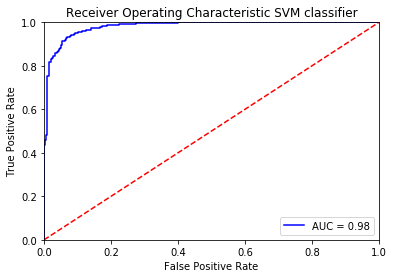

In [60]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
def most_informative_feature(vectorizer, classifier, top_features=20):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef)       


In [62]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)

Top Positive Coefficients
ومن 0.6389760030312831
مبروك 0.6427760320288731
افخم 0.7354821900800687
جديد 0.7379486450888817
جميله 0.7410394730276145
روعه 0.7462915618635909
لك 0.7463221474382973
شيلوها 0.8048985642467432
ذوق 0.8305574045573383
والفوز 0.8324184091629049
مدح 0.8657570902739674
الليله 0.8778157398081559
فيديو 0.8797355970924129
احلي 0.9772321277925127
اعجبني 1.060449067697011
افضل 1.1542309925001357
حماسيه 1.154617053577169
المبدع 1.1737416945661316
اجمل 1.2391458502910175
شيله 1.339603012982443

Top Negative Coefficients
تكفي -3.98065111959089
مشغلين -3.4113343981286626
الهياط -2.555980152367432
هياط -2.4494418236855644
يستر -2.2047651990741706
وهياط -2.1937807046738143
خشوم -2.012732263715363
ومشغلين -1.6968724825459005
يكفي -1.645491272557247
غصب -1.5840269681857666
تلوث -1.5658559235947198
سمعي -1.5364396829159874
او -1.5276151147173593
بدق -1.4095786332104852
كف -1.1852329476803578
حقه -1.1833693302096184
اب -1.070758205786087
بالحوش -1.0412081889841605
القبيله -1.0361